# 1. Project Talfa (Talent Fair)

This project is made for the Hacktiv8 Talent Fair Vol.3. Talfa-LANTIP (plant nutrition prediction) is a project that aims to predict plant nutritional data. The dataset contains several variables of plant nutritional data, named v1 to v8, the source of the sample, and the result that is numerical. The data is provided by Aria Indonesia, an agritech startup.
 



# 2. Introduction

I am Monica Pratiwi and I am passionate about data analysis. I hold a Bachelor's in Geography. Finding patterns nobody else sees is challenging for me. That is why I decided to pursue a career in the data science field. I aspire to be a good analyst.

# 3. External Link



# 4. Working Area

1. Able to create a prediction model of plant nutritional data that has been obtained from the test lab.
2. Able to explore and analyze the datasets.
3. Able to explain how to evaluate the model.
4. Able to explain the methodology used for every step, algorithm, data manipulation, data cleansing, etc.
5. Able to provide further improvement plan

## Import Library

In [5]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
!pip install feature_engine
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

In [7]:
# Load Data
df2 = pd.read_excel('/content/drive/MyDrive/Talent Fair/aria_data.xlsx')

In [8]:
# Take a look at the data
df2

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


In [9]:
# Data Information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


In [10]:
# Data Summary
df2.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


## Exploratory Data Analysis

In [11]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    # Skewness
    print('\nSkewness Value : ', df[variable].skew())

    plt.show()


Skewness Value :  0.6399112607855549


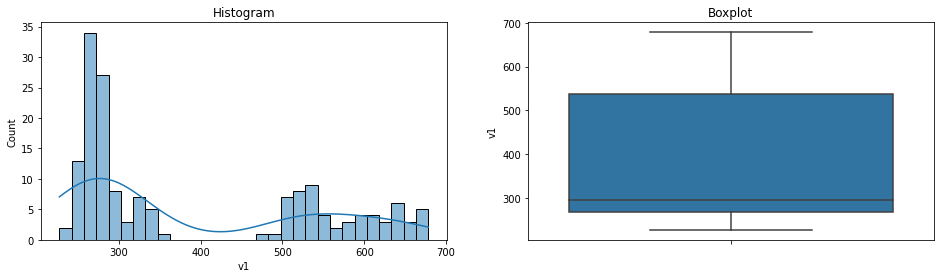

In [12]:
diagnostic_plots(df2, 'v1')


Skewness Value :  1.4617281099191999


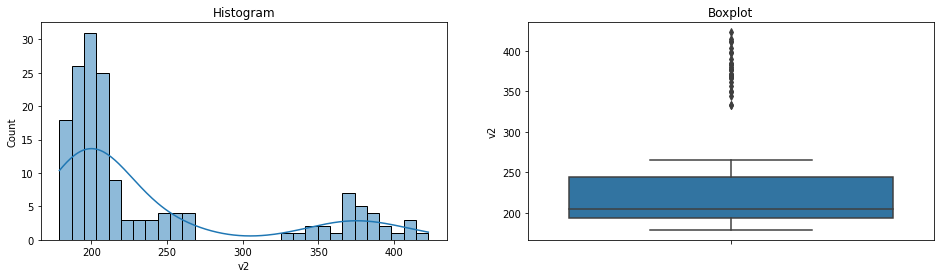

In [13]:
diagnostic_plots(df2, 'v2')


Skewness Value :  0.6026551795688342


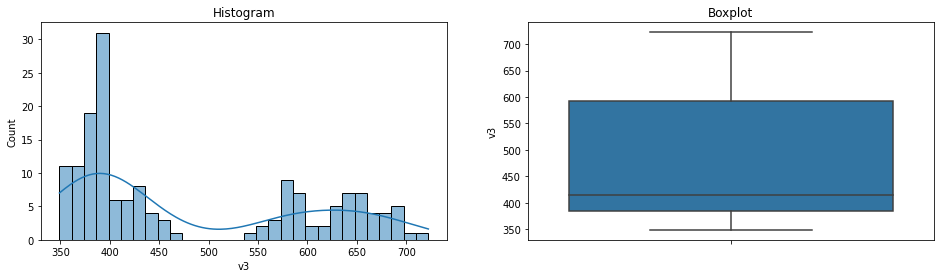

In [14]:
diagnostic_plots(df2, 'v3')


Skewness Value :  1.1436931932699348


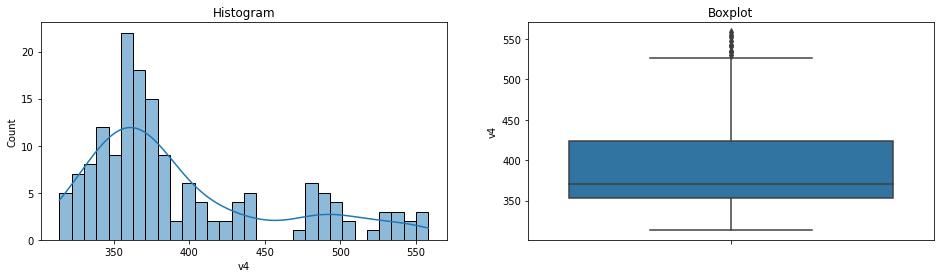

In [15]:
diagnostic_plots(df2, 'v4')


Skewness Value :  1.2706398850462628


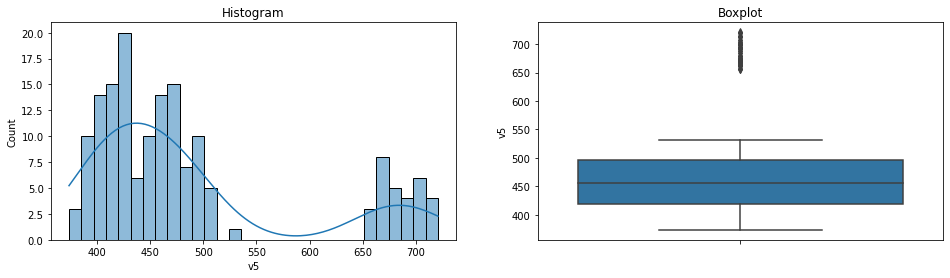

In [16]:
diagnostic_plots(df2, 'v5')


Skewness Value :  1.2954833782360857


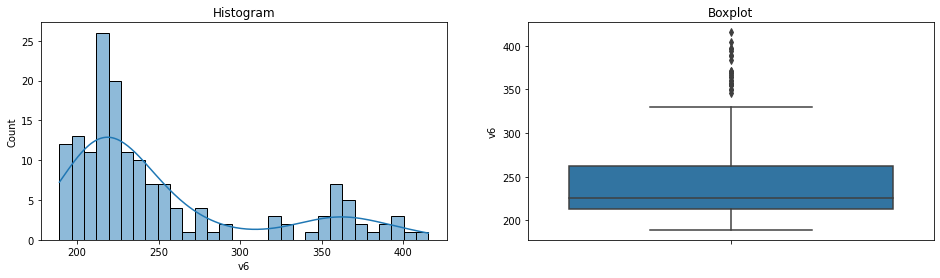

In [17]:
diagnostic_plots(df2, 'v6')


Skewness Value :  -0.10723483952914095


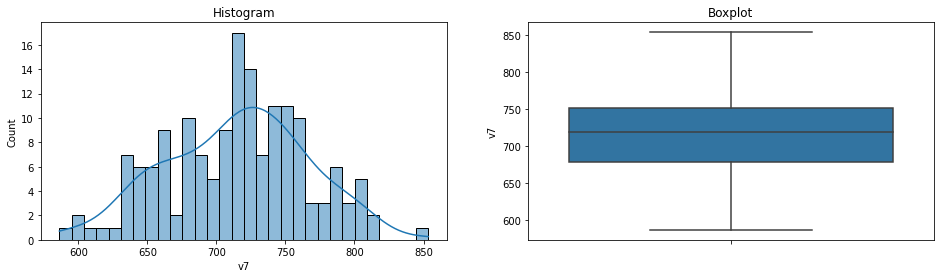

In [18]:
diagnostic_plots(df2, 'v7')


Skewness Value :  -0.7664435142947442


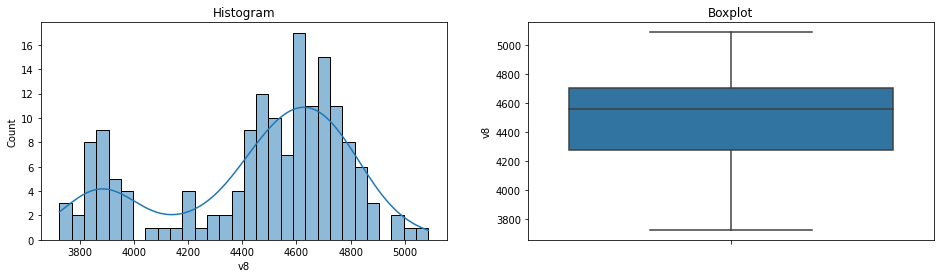

In [19]:
diagnostic_plots(df2, 'v8')

Based on the diagnostic plots above, several columns has outliers in their data, meaning that the columns do not have a normal distribution. There are 'v2', 'v4', 'v5', and 'v6'. In order to make a good regression model, it is better if the data is normally distributed. Therefore, the outliers have to be treated. Other columns are considered have a normal distribution with no visible outliers based on the boxplot.

Text(0.5, 1.0, 'Comparison of Service Type')

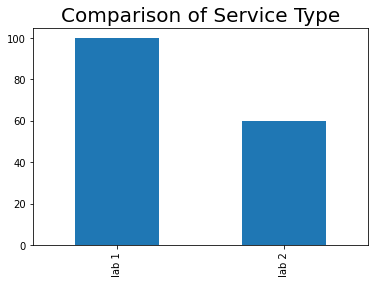

In [20]:
# Value counts of `sample_type`
df2['sample_type'].value_counts().plot(kind="bar")
plt.title('Comparison of Service Type', fontsize = 20)

There are 160 rows in this data contains information about plant nutritions. 100 samples are from lab 1 and 60 samples are from lab 2.

In [21]:
# Plotting on v8 and target
fig = px.scatter(df2, x="v8", y="target", color='sample_type')
fig.show()

There is a cluster containing samples originating from lab 2. most of the samples are clustered in the v8 range between 4400-4800 and the target range is between 4.4 and 5.

In [22]:
# Plotting on v1 and target
px.scatter(df2, x='v1', y='target', color='sample_type')

Unlinke v8, v1 samples from lab 1 and lab 2 are separated. v1 samples from lab 1 tend to have lower value than the samples from lab 2 and gathered in target range between 4.4 and 5. Samples from lab 2 that has lower v1 value gathered in target range between 4.6 to 5.1, while samples with higher v1 gathered in target range between 4.1 to 4.8. The higher the v1 level tends to have a lower target value.

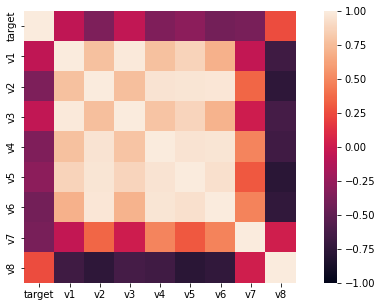

In [23]:
# Correlation Heatmap
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df2.corr(),vmin=-1, vmax=1, square=True);

The correlation between v2 and v5, with v8 tends to be high and has an inverse/negative correlation. It means that The greater the value of v8, the smaller the values of v2 and v5 will be. Vice versa. Apart from these two columns, every other column has a correlation that is neither too high nor too low with the target. The same thing happened between v2 and v4, v5, and v6. In order to make a prediction model with good accuracy, the feature selection must be done.

## Data Preprocessing

Data inference is used as 'new' data to test the ability of the best model later. It is extracted from df2. After being extracted, the index of df2 needs to be reset to make it more orderly. 

In [24]:
# Get data for model inference

data_inference = df2.sample(10, random_state=0)

In [25]:
# Remove inference set from dataset

data_train_test = df2.drop(data_inference.index)

In [26]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inference.reset_index(drop=True, inplace=True)

In order to predict the target, the 'target' column must be set as the target while other columns will be the feature. The feature and the target must be separated.

In [27]:
# Splitting between `X ` AND `y`

X = data_train_test.drop(['target'], axis=1) 
y = data_train_test['target']

In [28]:
# Splitting between Train-Set dengan Test-Set with scikit learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (120, 9)
Test Size:  (30, 9)


## Pipeline

In [29]:
# Define Numerical columns and Categorical Column

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns:  ['sample_type']


In [30]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

In [31]:
# Make Pipeline for preprocessing numerical columns

num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('standard', StandardScaler())
    ])

num_train = num_pipeline.fit_transform(X_train_num)

In [32]:
# Make Pipeline for preprocessing categorical columns

cat_pipeline = Pipeline([
        ('ohe', OneHotEncoder(sparse=False))
    ])

cat_train = cat_pipeline.fit_transform(X_train_cat)

In [33]:
# Full pipeline to process numerical and categorical columns
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']),
        ("cat", cat_pipeline, ['sample_type']),
    ])

# Fit and transform full pipeline to X_train
train_fin = full_pipeline.fit_transform(X_train)
train_fin

array([[ 1.79126157,  1.87141431,  1.72951921, ..., -2.05779129,
         0.        ,  1.        ],
       [-0.46195208,  0.25078739, -0.30649342, ...,  0.23567186,
         1.        ,  0.        ],
       [-0.88066032, -0.64917899, -0.80603969, ...,  0.27937663,
         1.        ,  0.        ],
       ...,
       [-0.86223024, -0.59647567, -0.57038236, ...,  0.64380264,
         1.        ,  0.        ],
       [ 0.76233139, -0.46414452,  0.82468265, ...,  0.81272852,
         0.        ,  1.        ],
       [-0.77295957, -0.58100839, -0.87651438, ...,  0.86141138,
         1.        ,  0.        ]])

In [34]:
# Transform full pipeline to X_test 

test_fin = full_pipeline.transform(X_test)
test_fin

array([[ 9.11006141e-01, -2.69715122e-01,  1.15376154e+00,
         2.73051740e-01,  1.67249272e-01, -1.96164223e-01,
         5.14286392e-01,  1.97774874e-01,  0.00000000e+00,
         1.00000000e+00],
       [-8.17389216e-01, -6.39440330e-01, -9.07805559e-01,
        -6.17350931e-01, -7.06766237e-01, -5.26968439e-01,
         6.62434499e-01,  5.35089776e-01,  1.00000000e+00,
         0.00000000e+00],
       [-7.65691762e-01, -7.00507431e-01, -1.02354815e+00,
        -1.13148332e+00, -1.03603910e+00, -6.61770817e-01,
        -9.87520624e-01,  2.77386849e-02,  1.00000000e+00,
         0.00000000e+00],
       [ 1.01944738e+00, -4.13446226e-01,  7.34981277e-01,
        -4.71585069e-01, -2.67470484e-01, -8.65337400e-01,
        -1.22019495e+00, -2.38710429e-04,  0.00000000e+00,
         1.00000000e+00],
       [-8.49065905e-01, -6.93174796e-01, -8.80582234e-01,
        -6.76434694e-01, -8.62230776e-01, -6.01798071e-01,
         3.96836467e-02,  9.46051237e-01,  1.00000000e+00,
         0.

## Model

In [35]:
# Define Model
model_linreg = LinearRegression(fit_intercept=True)
model_dtr = DecisionTreeRegressor(random_state = 0)
model_rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
model_svr = SVR(kernel='rbf')

In [36]:
# Linear Regression
model_linreg.fit(train_fin, y_train)

# Model Prediction
linreg_train = model_linreg.predict(train_fin)
linreg_test = model_linreg.predict(test_fin)

# Model Evaluation using MAE
print('Linear Regression MAE train = ', mean_absolute_error(y_train, linreg_train))
print('Linear Regression MAE test = ', mean_absolute_error(y_test, linreg_test))

Linear Regression MAE train =  0.1414044817607194
Linear Regression MAE test =  0.18443131421773523


In [37]:
# Decision Tree Regressor
model_dtr.fit(train_fin, y_train)

# Model Prediction
dtr_train = model_dtr.predict(train_fin)
dtr_test = model_dtr.predict(test_fin)

# Model Evaluation using MAE
print('Decision Tree Regressor MAE train = ', mean_absolute_error(y_train, dtr_train))
print('Decision Tree Regressor MAE test = ', mean_absolute_error(y_test, dtr_test))

Decision Tree Regressor MAE train =  0.0
Decision Tree Regressor MAE test =  0.17233333333333345


In [38]:
# Random Forest Regressor
model_rfr.fit(train_fin, y_train)

# Model Prediction
rfr_train = model_rfr.predict(train_fin)
rfr_test = model_rfr.predict(test_fin)

# Model Evaluation using MAE
print('Random Forest Regressor MAE train = ', mean_absolute_error(y_train, rfr_train))
print('Random Forest Regressor MAE test = ', mean_absolute_error(y_test, rfr_test))

Random Forest Regressor MAE train =  0.0585491666666665
Random Forest Regressor MAE test =  0.1593699999999997


In [39]:
# SVM Regressor
model_svr.fit(train_fin, y_train)

# Model Prediction
svr_train = model_svr.predict(train_fin)
svr_test = model_svr.predict(test_fin)

# Model Evaluation using MAE
print('MAE train = ', mean_absolute_error(y_train, svr_train))
print('MAE test = ', mean_absolute_error(y_test, svr_test))

MAE train =  0.12587633271415002
MAE test =  0.18024226860344097


In [40]:
# Defining all the parameters or the combination for model improvement

param_grid = {
    'bootstrap': [True],
    'n_estimators':[100,200],
    'max_depth':[5, 10, None],
    'max_features':[6,8,10,12,14,16]
}

In [41]:
# Initialized GridSearchCV

rfr_tuned = GridSearchCV(estimator=model_rfr,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

In [42]:
# Fit the model

rfr_tuned.fit(train_fin, y_train)
rfr_tuned.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


RandomForestRegressor(max_depth=5, max_features=6, random_state=0)

In [43]:
pd.DataFrame(rfr_tuned.cv_results_).shape

(36, 15)

In [44]:
# Best Model
model = rfr_tuned.best_estimator_

# Fit the best model with trained data
model.fit(train_fin, y_train)

# Predict
model_train = model.predict(train_fin)
model_test = model.predict(test_fin)

In [45]:
# Model Evaluation

print('MAE train = ', mean_absolute_error(y_train, model_train))
print('MAE test = ', mean_absolute_error(y_test, model_test))

MAE train =  0.08667363799034739
MAE test =  0.16961187446459952


Mean Average Error: average differences between predicted values and actual values. On average, model with smallest the gap between the predicted value and the actual value is considered as a good model. Hence Random Forest Regressor is choosen.


## Combine Pipeline

In [46]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both')),
                                                 ('standard',
                                                  StandardScaler())]),
                                 ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7',
                                  'v8']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(sparse=False))]),
                                 ['sample_type'])])

In [47]:
# Combine All Process
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("prediction", model)
])

all_process.fit(X_train, y_train)
fin = all_process.predict(X_test)

print('MAE test = ', mean_absolute_error(y_test, fin))

MAE test =  0.16961187446459952


## Inference

In [48]:
data_inference

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.95,482.562500,191.312500,559.875000,353.125000,477.000000,195.250000,638.812500,4462.062500,lab 2
1,5.00,505.866667,184.266667,547.866667,337.933333,460.666667,196.333333,596.400000,4430.066667,lab 2
2,4.34,616.933333,333.600000,654.600000,494.533333,655.733333,350.266667,723.866667,3823.000000,lab 2
3,4.74,248.933333,203.933333,365.200000,332.933333,390.933333,202.200000,664.000000,4646.200000,lab 1
4,4.83,269.933333,205.666667,393.200000,371.333333,459.800000,241.266667,755.733333,4699.600000,lab 1
5,4.93,504.357143,211.285714,626.642857,436.785714,502.071429,214.857143,806.857143,4836.571429,lab 2
6,4.90,534.333333,226.733333,592.266667,377.600000,496.133333,230.866667,690.200000,4508.000000,lab 2
7,4.48,298.437500,201.562500,419.062500,396.750000,467.875000,239.750000,801.562500,4495.437500,lab 1
8,4.63,332.500000,254.437500,430.437500,419.375000,475.312500,264.125000,745.312500,4747.750000,lab 1
9,4.66,333.714286,261.785714,461.142857,437.357143,492.428571,273.428571,791.142857,4780.928571,lab 1


In [49]:
# Predict 

pred_inference = all_process.predict(data_inference)
pred_inference

array([4.90117397, 4.88228171, 4.63309711, 4.88605998, 4.62594839,
       4.82875154, 4.93527421, 4.67355254, 4.66165111, 4.69005505])

In [50]:
# Create DataFrame

pred_inf_df = pd.DataFrame(pred_inference, columns=['Target - Prediction'])
pred_inf_df

,Target - Prediction
0,4.901174
1,4.882282
2,4.633097
3,4.886060
4,4.625948
5,4.828752
6,4.935274
7,4.673553
8,4.661651
9,4.690055


In [51]:
# Concate between Inference-Set and Rating's Prediction

pd.concat([data_inference['target'], pred_inf_df], axis=1)

,target,Target - Prediction
0,4.95,4.901174
1,5.00,4.882282
2,4.34,4.633097
3,4.74,4.886060
4,4.83,4.625948
5,4.93,4.828752
6,4.90,4.935274
7,4.48,4.673553
8,4.63,4.661651
9,4.66,4.690055


# 5. Conclusion / Overall Analysis
Based on the EDA process, several columns have outliers and in order to make a good regression model it is decided to trim the outlier using Winsorizer. It is also found that several columns have the high correlation among each other. However, feature selection is not conducted because because these unknown variables is feared to be an important variable in determining the target value. Making a model using a pipeline is done to prevent data leakage and to make preprocessing simpler. Based on average, model with random forest regressor has smallest the gap between the predicted value and the actual value. Further improvement for this project is to try to do feature selection and also do deployment so that it can be tested directly by other users.
